# Data Wrangling

## Extract data from a scientific paper

This will extract Table 1 from the scientific paper [_NMR determination of pKa values in α‐synuclein_](https://doi.org/10.1002/pro.556).
The first extraction is very messy, so a bit of cleanup is added in the following lines.
Note that `pandas` requires that the `lxml` package is installed.
To run this, do the following:
1. Follow the link to the above paper, assuming you have full-text access
2. Save the page as `croke.html` and place it in this folder
3. Run the cell below

In [1]:
import pandas as pd
db = pd.read_html('croke.html')[0]["No salt"] # HTML exported from journal page (not provided here)
db.drop(db.tail(1).index,inplace=True)
db.drop(columns=['n', 'Î´low', 'Î´high'], inplace=True)
pKa = db.pKa.str.split('Â').str.get(0).astype(float)
err = db.pKa.str.split('Â').str.get(1).str.split('±').str.get(1).astype(float)
db = db.assign(pKa=pKa)
db = db.assign(err=err)
db = db.assign(Site=db.Site.str.split(' ').str.get(0).str.replace('cc', '').str.replace('dd',''))
db = db.assign(resname = db.Site.str.split('([A-Za-z]+)(\d+)').str.get(1).astype(str))
db = db.assign(resnum = db.Site.str.split('([A-Za-z]+)(\d+)').str.get(2).astype(int))
#db.drop(columns=['Site'], inplace=True)
db.to_csv('croke.csv')
db.tail()

,Site,pKa,err,resname,resnum
20,Glu130,4.53,0.06,Glu,130
21,Glu131,4.58,0.05,Glu,131
22,Asp135,4.16,0.07,Asp,135
23,Glu137,4.82,0.16,Glu,137
24,Glu139,4.69,0.04,Glu,139


<AxesSubplot:xlabel='Site'>

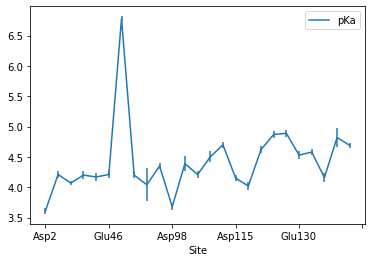

In [2]:
db.plot(x='Site', y='pKa', yerr='err')